# CS 109A/AC 209A/STAT 121A Data Science: Data Driven March Madness Milestone #3
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Saturday, November 6th, 2016 at 11:59pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import copy
from mpl_toolkits.mplot3d import Axes3D
import csv
from sklearn import linear_model
import sklearn.discriminant_analysis as da
%matplotlib inline

/Users/nishantkakar/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


**Loading in Each Dataframe:**

In [2]:
teams_df = pd.read_csv('datasets/Teams.csv', delimiter=',')
seasons_df = pd.read_csv('datasets/Seasons.csv', delimiter = ',')
seasons_results_detailed_df = pd.read_csv('datasets/RegularSeasonDetailedResults.csv', delimiter = ',')
seasons_results_compact_df = pd.read_csv('datasets/RegularSeasonCompactResults.csv', delimiter = ',')
tourney_results_detailed_df = pd.read_csv('datasets/TourneyDetailedResults.csv', delimiter = ',')
tourney_results_compact_df = pd.read_csv('datasets/TourneyCompactResults.csv', delimiter = ',')
tourney_seeds_df = pd.read_csv('datasets/TourneySeeds.csv', delimiter = ',')

**Creating Additional Datasets:**

In [3]:
################
## Commented out so the datasets aren't created again (we had to manually eliminate wild card games for the tournament)
################


# def add_to_csv(df_lst, m = 'a'):
#     #write pandas to csv
#     count = 2003
#     if m == 'a':
#         for df in df_lst:
#             #create csv and add pandas, use name
#             df.to_csv('datasets/toruney_selected_reg_season_detailed_results/reg_season/%s_regular_seas.csv'%count)
#             count += 1
#     else:
#         for df in df_lst:
#             #create csv and add pandas, use name
#             df.to_csv('datasets/toruney_selected_reg_season_detailed_results/tourney/%s_tourney.csv'%count)
#             count += 1

# #create a dictionary to store which teams were in which years
# yearly_dfs = []
# teams_per_year = {}
# for i in range(2003, 2016, 1):
#     teams_per_year[i] = []

# for key, value in teams_per_year.iteritems():
#     year = tourney_results_detailed_df[tourney_results_detailed_df.Season == key]
#     wteam_array = year['Wteam']
#     team_array = np.append(wteam_array, year['Lteam'])
#     teams_per_year[key] = sorted(np.unique(team_array))

# for key, value in teams_per_year.iteritems():
#     _yearly_df = pd.DataFrame(columns = list(seasons_results_detailed_df.columns.values))
#     for index, row in seasons_results_detailed_df[seasons_results_detailed_df.Season == key].iterrows():
#         if row['Wteam'] in value or row['Lteam'] in value:
#             _yearly_df = _yearly_df.append(row)
#     yearly_dfs.append(_yearly_df)
    
# tourney_dfs = []
# for i in range(2003, 2016, 1):
#     tourney_dfs.append(tourney_results_detailed_df[tourney_results_detailed_df.Season == i])
    
# add_to_csv(tourney_dfs, m = 'd')
# add_to_csv(yearly_dfs)

**Preliminary Model Setup:**

In [ ]:
# Assemble season long stats for each team in each year
leagueData = {}
categories = ['pointDifferential', 'fieldGoalsMade', 'fieldGoalsAtt', 'freeThrowsMade',
                  'freeThrowAtt', 'offReb', 'assists', 'turnovers', 'defReb', 'steals', 
                 'blocks', 'fieldGoalsAllowed', 'oppFieldGoalsAtt', 'freeThrowsAllowed', 
                 'oppFreeThrowsAtt']

for index, game in seasons_results_detailed_df.iterrows():
    year = int(game['Season'])
    winningTeam = int(game['Wteam'])
    losingTeam = int(game['Lteam'])
    
    winningTeamStats = {}
    losingTeamStats = {}
    
    pointDifferential = int(game['Wscore']) - int(game['Lscore'])
    winningTeamStats['pointDifferential'] = pointDifferential
    losingTeamStats['pointDifferential'] = pointDifferential * -1
    
    winningTeamStats['fieldGoalsMade'] = int(game['Wfgm'])
    losingTeamStats['fieldGoalsMade'] = int(game['Lfgm'])
    
    winningTeamStats['fieldGoalsAtt'] = int(game['Wfga'])
    losingTeamStats['fieldGoalsAtt'] = int(game['Lfga'])
    
    winningTeamStats['freeThrowsMade'] = int(game['Wftm'])
    losingTeamStats['freeThrowsMade'] = int(game['Lftm'])
    
    winningTeamStats['freeThrowAtt'] = int(game['Wfta'])
    losingTeamStats['freeThrowAtt'] = int(game['Lfta'])
    
    winningTeamStats['offReb'] = int(game['Wor'])
    losingTeamStats['offReb'] = int(game['Lor'])
    
    winningTeamStats['assists'] = int(game['Wast'])
    losingTeamStats['assists'] = int(game['Last'])
    
    winningTeamStats['turnovers'] = int(game['Wto'])
    losingTeamStats['turnovers'] = int(game['Lto'])
    
    winningTeamStats['defReb'] = int(game['Wdr'])
    losingTeamStats['defReb'] = int(game['Ldr'])
    
    winningTeamStats['steals'] = int(game['Wstl'])
    losingTeamStats['steals'] = int(game['Lstl'])
    
    winningTeamStats['blocks'] = int(game['Wblk'])
    losingTeamStats['blocks'] = int(game['Lblk'])  

    winningTeamStats['fieldGoalsAllowed'] = int(game['Lfgm'])
    losingTeamStats['fieldGoalsAllowed'] = int(game['Wfgm'])
    
    winningTeamStats['oppFieldGoalsAtt'] = int(game['Lfga'])
    losingTeamStats['oppFieldGoalsAtt'] = int(game['Wfga'])
    
    winningTeamStats['freeThrowsAllowed'] = int(game['Lftm'])
    losingTeamStats['freeThrowsAllowed'] = int(game['Wftm'])
    
    winningTeamStats['oppFreeThrowsAtt'] = int(game['Lfta'])
    losingTeamStats['oppFreeThrowsAtt'] = int(game['Wfta'])
    
    if year not in leagueData:
        leagueData[year] = {}

    if winningTeam in leagueData[year]:
        for category in categories:
            leagueData[year][winningTeam][category] += winningTeamStats[category]
        leagueData[year][winningTeam]['totalGames'] += 1
    else:
        leagueData[year][winningTeam] = winningTeamStats
        leagueData[year][winningTeam]['totalGames'] = 1
        
    if losingTeam in leagueData[year]:
        for category in categories:
            leagueData[year][losingTeam][category] += winningTeamStats[category]
        leagueData[year][losingTeam]['totalGames'] += 1
    else:
        leagueData[year][losingTeam] = losingTeamStats
        leagueData[year][losingTeam]['totalGames'] = 1

for year in leagueData:
    for team in leagueData[year]:
        totalTeamGames = leagueData[year][team]['totalGames']

        for category in leagueData[year][team]:
            leagueData[year][team][category] = leagueData[year][team][category]/float(totalTeamGames)

**The Model:**

In [94]:
# Given a year, will generate an object with baseline and model-predicted brackets and access to other statistics
class MarchMadnessTournament:
    def __init__(self, year):
        self.year = year
        self.tourney_df = pd.read_csv('datasets/toruney_selected_reg_season_detailed_results/tourney/' + str(year) + '_tourney.csv', delimiter = ',')
        self.matchups = self.bracket_matchups(self.tourney_df)
        self.actualBracket = self.actual_bracket(self.tourney_df)
        self.teamToSeedMapping = self.create_team_to_seed_mapping(self.year)
        self.baselineBracket = self.lower_seed_bracket(self.tourney_df, self.year, self.matchups, self.teamToSeedMapping)
        self.modelBracket = None
        self.topBrackets = None
        
        self.baselineMatchupAccuracy = self.baseline_matchup_accuracy(self.tourney_df, self.year, self.teamToSeedMapping)
        self.modelMatchupAccuracy = None
        
        self.trainAndTestModel(self.year, 'single')
        self.trainAndTestModel(self.year, 'top10')

        self.baselineBracketAccuracy = self.weighted_accuracy(self.actualBracket, self.baselineBracket)
        self.modelBracketAccuracy = self.weighted_accuracy(self.actualBracket, self.modelBracket)
        self.modelBracketVariance = self.differential_score(self.baselineBracket, self.modelBracket)
        
    # Given: all the matchups in a tournament
    # Return: a list of lists of lists representing the matchups in each round
    def bracket_matchups(self, tourney_df):
        rounds = [[], [], [], [], [], []]
        count = 0
        temp = [] # keeps track of which teams have already been seen in the previous round

        for index, row in tourney_df.iterrows():
            if row['Wteam'] in temp:
                count += 1
                temp = []
            rounds[count].append([row['Wteam'], row['Lteam']])
            temp.append(row['Wteam'])
            temp.append(row['Lteam'])

        return rounds
    
    # Given: all the matchups in a tournament
    # Return: a list of lists representing all the winners in each round
    def actual_bracket(self, tourney_df):
        rounds = [[], [], [], [], [], []]
        temp = []
        count = 0

        for index, row in tourney_df.iterrows():
            if row['Wteam'] in temp:
                count += 1
                temp = []
            rounds[count].append(row['Wteam'])
            temp.append(row['Wteam'])

        return rounds
    
    # Given: a tournament year
    # Return: a dictionary with all the seedings for the 4 year span used to train and test the model
    def create_team_to_seed_mapping(self, tournamentYear):
        teamToSeedMapping = {}
        for year in range(tournamentYear-3, tournamentYear+1):
            seedsForYear = {}
            seeds = tourney_seeds_df[tourney_seeds_df.Season == year]
            for index, row in seeds.iterrows():
                try:
                    seedsForYear[int(row['Team'])] = int(row['Seed'][1:])
                except:
                    seedsForYear[int(row['Team'])] = int(row['Seed'][1:-1])

            teamToSeedMapping[year] = seedsForYear
        
        return teamToSeedMapping
    
    # Given: An actual and predicted bracket (list of lists representing winners in each round)
    # Return: A weighted accuracy score
    def weighted_accuracy(self, actual, predicted):
        score = 0
        bth_pre = zip(actual, predicted)
        scalars = [1, 2, 4, 8, 16, 32]

        for index, rnd in enumerate(bth_pre):
            com = list(set(rnd[0]) & set(rnd[1]))
            score += len(com) * scalars[index]

        return score/192.0
    
    # Given: An actual and predicted bracket (list of lists representing winners in each round)
    # Return: An unweighted accuracy score
    # NOT USED
    def accuracy_score(self, actual, predicted):
        score = 0
        bth_pre = zip(actual, predicted)

        for index, rnd in enumerate(bth_pre):
            com = list(set(rnd[0]) & set(rnd[1]))
            score += len(com)

        return score/63.0
    
    # Given: Two brackets: One predicted by the baseline model, the other predicted by our model
    # Return: The variance between the two brackets
    def differential_score(self, baselineBracket, modelBracket):
        score = 0
        bth_pre = zip(baselineBracket, modelBracket)
        for rnd in bth_pre:
            com = list(set(rnd[0]) & set(rnd[1]))
            score += (len(rnd[1]) - len(com))

        return score/63.0
    
    # Calculates how accurate the baseline model is for predicting given matchups
    def baseline_matchup_accuracy(self, tourney_df, tournamentYear, seedMapping):
        right = 0.0
        tot = 0.0
        for index, row in tourney_df.iterrows():
            if seedMapping[tournamentYear][row['Wteam']] < seedMapping[tournamentYear][row['Lteam']]:
                right += 1
            tot += 1
        return right/tot
    
    # Parameters: All the matchups and the year of a tournament
    # Return: A list of lists representing a bracket that a baseline model would predict (lower seed always wins)
    def lower_seed_bracket(self, tourney_df, tournamentYear, tournamentMatchups, seedMapping):
        rounds = [[], [], [], [], [], []]
        matchups = copy.deepcopy(tournamentMatchups)
        
        for currentRound in range(6):
            for currentRoundMatchup in matchups[currentRound]:
                team1 = currentRoundMatchup[0]
                team2 = currentRoundMatchup[1]
                winningTeam = None
                losingTeam = None
                
                if seedMapping[tournamentYear][team1] > seedMapping[tournamentYear][team2]:
                    winningTeam = team2
                    losingTeam = team1
                elif seedMapping[tournamentYear][team1] < seedMapping[tournamentYear][team2]:
                    winningTeam = team1
                    losingTeam = team2
                else:
                    if random.random() < 0.5:
                        winningTeam = team1
                        losingTeam = team2
                    else:
                        winningTeam = team2
                        losingTeam = team1
                        
                rounds[currentRound].append(winningTeam)
                
                if currentRound == 5:
                    continue
                
                # updates future matchups
                for matchup in matchups[currentRound+1]:
                    if losingTeam == matchup[0]:
                        matchup[0] = winningTeam
                        break
                    elif losingTeam == matchup[1]:
                        matchup[1] = winningTeam
                        break
                        
        return rounds
    
    # Given: A Year and a Trained Logistic Regression Model (based on past 3 years of tournament data)
    # Predicts a single bracket according to the model
    def predict_bracket(self, model):
        tourney = self.tourney_df
        matchups = copy.deepcopy(self.matchups)
        actualBracket = self.actualBracket

        bracketPredictions = [[], [], [], [], [], []]
        
        for currentRound in range(6):
            for currentRoundMatchup in matchups[currentRound]:
                team1 = currentRoundMatchup[0]
                team2 = currentRoundMatchup[1]
                winningTeam = None
                losingTeam = None
                
                team1Seed = self.teamToSeedMapping[self.year][team1]
                team2Seed = self.teamToSeedMapping[self.year][team2]
                team1Stats = leagueData[self.year][team1]
                team2Stats = leagueData[self.year][team2]

                matchupVector = [team1Stats[category] + team2Stats[category] for category in categories] + [team1Seed] + [team2Seed]

                # gets the result and confidence of the result
                probEstimates = dict(zip([1,0], model.predict_proba(np.array(matchupVector).reshape(1, -1))[0]))
                result = max(probEstimates.iterkeys(), key=(lambda x: probEstimates[x]))
                confidence = probEstimates[result]

                if result == 1:
                    bracketPredictions[currentRound].append(team1)
                    winningTeam = team1
                    losingTeam = team2
                else:
                    bracketPredictions[currentRound].append(team2)
                    winningTeam = team2
                    losingTeam = team1
                        
                if currentRound == 5:
                    continue
                
                # updates future matchups
                for matchup in matchups[currentRound+1]:
                    if losingTeam == matchup[0]:
                        matchup[0] = winningTeam
                        break
                    elif losingTeam == matchup[1]:
                        matchup[1] = winningTeam
                        break
                        
        self.modelBracket = bracketPredictions
    
    # Given: A Year and a Trained Logistic Regression Model (based on past 3 years of tournament data)
    # Predicts 10 brackets, with each matchup being predicted by the confidence in the model prediction i.e. if 
    # our model says Kentucky will beat Kansas with 70% confidence, in 70% of brackets Kentucky will advance and
    # in 30% of brackets Kansas will advance
    def predict_brackets(self, model):
        brackets = []
        tourney = self.tourney_df
        actualBracket = self.actualBracket
        lowerSeedBracket = self.baselineBracket

        # generates 10 predicted brackets along with their weighted accuracy
        for i in range(10):
            bracketPredictions = [[], [], [], [], [], []]
            matchups = copy.deepcopy(self.matchups)
            
            for currentRound in range(6):
                for currentRoundMatchup in matchups[currentRound]:
                    team1 = currentRoundMatchup[0]
                    team2 = currentRoundMatchup[1]
                    winningTeam = None
                    losingTeam = None

                    team1Seed = self.teamToSeedMapping[self.year][team1]
                    team2Seed = self.teamToSeedMapping[self.year][team2]
                    team1Stats = leagueData[self.year][team1]
                    team2Stats = leagueData[self.year][team2]

                    matchupVector = [team1Stats[category] + team2Stats[category] for category in categories] + [team1Seed] + [team2Seed]

                    # gets the result and confidence of the result
                    probEstimates = dict(zip([1,0], model.predict_proba(np.array(matchupVector).reshape(1, -1))[0]))
                    result = max(probEstimates.iterkeys(), key=(lambda x: probEstimates[x]))
                    confidence = probEstimates[result]
                    
                    if (result == 1 and random.random() < confidence) or (result == 0 and random.random() > confidence):
                        bracketPredictions[currentRound].append(team1)
                        winningTeam = team1
                        losingTeam = team2
                    else:
                        bracketPredictions[currentRound].append(team2)
                        winningTeam = team2
                        losingTeam = team1

                    if currentRound == 5:
                        continue
                    
                    # updates future matchups
                    for matchup in matchups[currentRound+1]:
                        if losingTeam == matchup[0]:
                            matchup[0] = winningTeam
                            break
                        elif losingTeam == matchup[1]:
                            matchup[1] = winningTeam
                            break
        
            brackets.append((bracketPredictions, self.weighted_accuracy(actualBracket, bracketPredictions)))

        bestWeightedBrackets = sorted(brackets, key=lambda x: x[1])

        finalRankings = []
        for bracket in bestWeightedBrackets:
            variance = self.differential_score(lowerSeedBracket, bracket[0])
            finalRankings.append((bracket[0], bracket[1], variance))

        self.topBrackets = finalRankings
    
    # trains and tests our logistic regression model using the windowed approach (past 3 years of regular season
    # and tournament data)
    def trainAndTestModel(self, tournamentYear, predictionType):
        trainingData = []
        for index, game in tourney_results_detailed_df.iterrows():
            matchupVector = []
            year = int(game['Season'])

            possibleYears = range(tournamentYear-3, tournamentYear)

            if year in possibleYears:
                
                winningTeam = int(game['Wteam'])
                losingTeam = int(game['Lteam'])
                
                winningTeamSeed = self.teamToSeedMapping[year][winningTeam]
                losingTeamSeed = self.teamToSeedMapping[year][losingTeam]

                winningTeamStats = leagueData[year][winningTeam]
                losingTeamStats = leagueData[year][losingTeam]

                matchupVector = [winningTeamStats[category] + losingTeamStats[category] for category in categories] + [winningTeamSeed] + [losingTeamSeed] + [1] 
                trainingData.append(matchupVector)

                matchupVector = [losingTeamStats[category] + losingTeamStats[category] for category in categories] + [losingTeamSeed] + [winningTeamSeed] + [0]
                trainingData.append(matchupVector)

        # load testing data (the year i+3)
        testingData = []
        for index, game in tourney_results_detailed_df.iterrows():
            matchupVector = []
            year = int(game['Season'])

            if year == tournamentYear:
                winningTeam = int(game['Wteam'])
                losingTeam = int(game['Lteam'])
            
                winningTeamSeed = self.teamToSeedMapping[year][winningTeam]
                losingTeamSeed = self.teamToSeedMapping[year][losingTeam]
                
                winningTeamStats = leagueData[year][winningTeam]
                losingTeamStats = leagueData[year][losingTeam]

                matchupVector = [winningTeamStats[category] + losingTeamStats[category] for category in categories] + [winningTeamSeed] + [losingTeamSeed] + [1] 
                testingData.append(matchupVector)

                matchupVector = [losingTeamStats[category] + losingTeamStats[category] for category in categories] + [losingTeamSeed] + [winningTeamSeed] + [0]
                testingData.append(matchupVector)

        trainingData = np.array(trainingData)
        x_train = trainingData[:, :-1]
        y_train = trainingData[:, -1]

        testingData = np.array(testingData)
        x_test = testingData[:, :-1]
        y_test = testingData[:, -1]

        logreg = linear_model.LogisticRegression()
        logreg.fit(x_train, y_train)

        self.modelMatchupAccuracy = logreg.score(x_test, y_test)
        
        if predictionType == 'single':
            self.predict_bracket(logreg)
        elif predictionType == 'top10':
            self.predict_brackets(logreg)


**Exploration of Model Results:**

In [90]:
# calculates and stores the matchup and bracket accuracies for the baseline and actual model for 2006-2015
modelMatchupAccuracies = []
baselineMatchupAccuracies = []

modelBracketAccuracies = []
baselineBracketAccuracies = []

for i in range(2003, 2013):
    marchMadnessModel = MarchMadnessTournament(i+3)
    
    modelMatchupAccuracies.append(marchMadnessModel.modelMatchupAccuracy)
    modelBracketAccuracies.append(marchMadnessModel.modelBracketAccuracy)

    averageBaselineMatchupAccuracy = 0.0
    averageBaselineBracketAccuracy = 0.0
    for j in range(10):
        marchMadnessModel = MarchMadnessTournament(i+3)
        averageBaselineMatchupAccuracy += marchMadnessModel.baselineMatchupAccuracy
        averageBaselineBracketAccuracy += marchMadnessModel.baselineBracketAccuracy
    
    baselineMatchupAccuracies.append(averageBaselineMatchupAccuracy/10.0)
    baselineBracketAccuracies.append(averageBaselineBracketAccuracy/10.0)
    

[0.41145833333333337, 0.6260416666666666, 0.61875, 0.71875, 0.5604166666666667, 0.546875, 0.6458333333333333, 0.65, 0.5208333333333333, 0.521875]


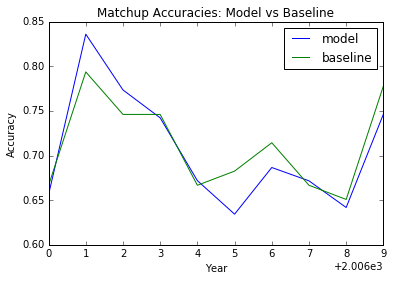

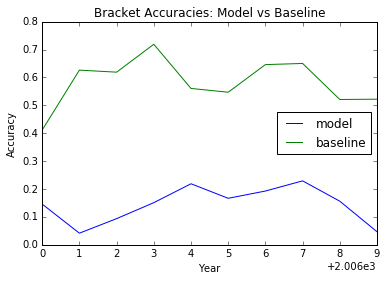

In [91]:
plt.plot(range(2006, 2016), modelMatchupAccuracies, color='b', label='model')
plt.plot(range(2006, 2016), baselineMatchupAccuracies, color='g', label='baseline')
plt.xlabel("Year")
plt.ylabel("Accuracy")
plt.title("Matchup Accuracies: Model vs Baseline")
plt.legend(loc='best')
plt.show()

plt.clf()
plt.plot(range(2006, 2016), modelBracketAccuracies, color='b', label='model')
plt.plot(range(2006, 2016), baselineBracketAccuracies, color='g', label='baseline')
plt.xlabel("Year")
plt.ylabel("Accuracy")
plt.title("Bracket Accuracies: Model vs Baseline")
plt.legend(loc='best')
plt.show()

In [100]:
baselineAccuracies = []
bestBracketAccuracies = []

for i in range(2003, 2013):
    marchMadnessModel = MarchMadnessTournament(i+3)
    topBrackets = np.array(marchMadnessModel.topBrackets)
    
    averageBaselineAccuracy = 0.0
    for j in range(10):
        marchMadnessModel = MarchMadnessTournament(i+3)
        averageBaselineAccuracy += marchMadnessModel.baselineBracketAccuracy
    
    averageBaselineAccuracy /= 10.0
    bestBracketAccuracy = topBrackets[-1, 1]
    
    baselineAccuracies.append(averageBaselineAccuracy)
    bestBracketAccuracies.append(bestBracketAccuracy)

#### USED TO PLOT ACCURACY OF ALL 10 GENERATED BRACKETS AGAINST THE BASELINE MODEL
#     plt.clf
#     plt.plot(range(10), topBrackets[:, 1], color='b', label='Model Accuracy')
#     plt.plot(range(10), [averageBaselineAccuracy]*10, color='g', label='Baseline Accuracy')
#     plt.ylabel("Accuracy")
#     plt.title(str(i+3) + "Bracket Accuracies: Model vs Baseline")
#     plt.legend(loc='best')
#     plt.show()

numBetter = 0.0
baselineTop5 = 0.0
baselineTop10 = 0.0
top5Perc = 0.0
top10Perc = 0.0
for i in range(10):
    if baselineAccuracies[i] < bestBracketAccuracies[i]:
        numBetter += 1
    if baselineAccuracies[i] * 1930.0 >= 980:
        baselineTop5 += 1
    if baselineAccuracies[i] * 1930.0 >= 920:
        baselineTop10 += 1
    if bestBracketAccuracies[i] * 1930.0 >= 980:
        top5Perc += 1
    if bestBracketAccuracies[i] * 1930.0 >= 920:
        top10Perc += 1

print "We beat baseline in", numBetter * 10, "percent of years"
print "Baseline model is a top 5% bracket in", baselineTop5 * 10, "percent of years"
print "Baseline model is a top 10% bracket in", baselineTop10 * 10, "percent of years"
print "We got a top 5% bracket in", top5Perc * 10, "percent of years"
print "We got a top 10% bracket in", top10Perc * 10, "percent of years"

[0.41145833333333337, 0.6427083333333334, 0.6854166666666667, 0.71875, 0.4604166666666666, 0.546875, 0.6458333333333333, 0.675, 0.5208333333333333, 0.5802083333333333]
[0.359375, 0.4375, 0.4114583333333333, 0.328125, 0.3333333333333333, 0.5104166666666666, 0.4895833333333333, 0.5677083333333334, 0.53125, 0.2552083333333333]
We beat baseline in 10.0 percent of years
Baseline model is a top 5% bracket in 80.0 percent of years
Baseline model is a top 10% bracket in 80.0 percent of years
We got a top 5% bracket in 30.0 percent of years
We got a top 10% bracket in 40.0 percent of years
